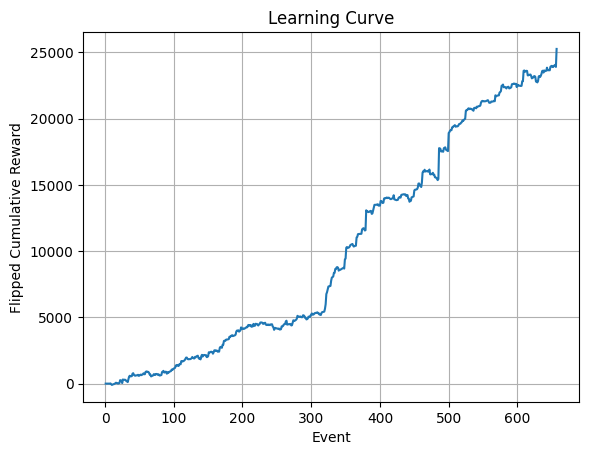

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results/cumulative_rewards1.csv')

# flip the sign of cumulative reward
df['cum_reward_flipped'] = -df['cum_reward']

plt.figure()
plt.plot(df['loop'], df['cum_reward_flipped'], linestyle='-')
plt.xlabel('Event')
plt.ylabel('Flipped Cumulative Reward')
plt.title('Learning Curve')
plt.grid(True)
plt.show()


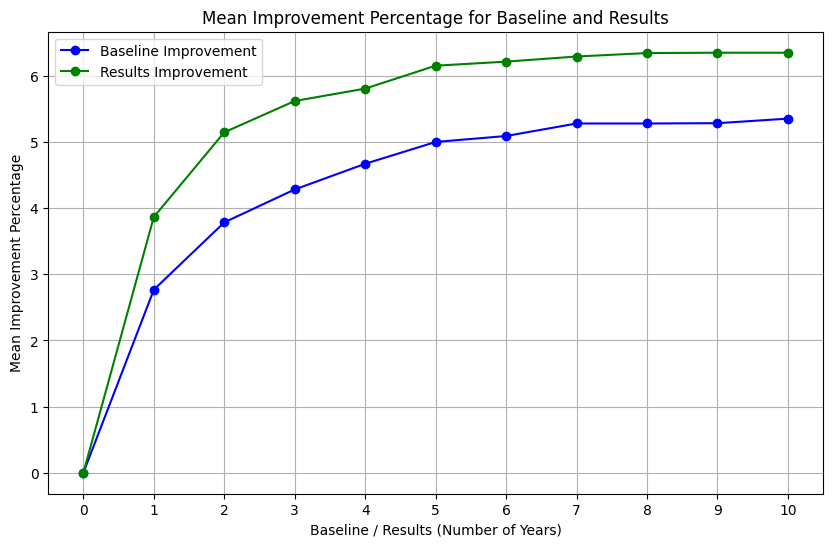

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_improvement_ratio(csv_file):
    df = pd.read_csv(csv_file)

    df['improvement_ratio']
    
    mean_improvement_ratio = df['improvement_ratio'].mean()
    return mean_improvement_ratio

def plot_improvement_ratios():
    baseline_files = [f"results/baseline{i}.csv" for i in range(1, 11)]
    result_files = [f"results/trained{i}.csv" for i in range(1, 11)]
    
    baseline_improvement_ratios = []
    result_improvement_ratios = []
    
    for baseline_file in baseline_files:
        mean_ratio = calculate_improvement_ratio(baseline_file)
        baseline_improvement_ratios.append(mean_ratio)
    
    for result_file in result_files:
        mean_ratio = calculate_improvement_ratio(result_file)
        result_improvement_ratios.append(mean_ratio)
    
    baseline_improvement_ratios.insert(0, 0)
    result_improvement_ratios.insert(0, 0)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(range(0, 11), baseline_improvement_ratios, marker='o', linestyle='-', color='b', label='Baseline Improvement')
    
    plt.plot(range(0, 11), result_improvement_ratios, marker='o', linestyle='-', color='g', label='Results Improvement')
    
    # Customize plot
    plt.title('Mean Improvement Percentage for Baseline and Results')
    plt.xlabel('Baseline / Results (Number of Years)')
    plt.ylabel('Mean Improvement Percentage')
    plt.xticks(range(0, 11))
    plt.legend()
    plt.grid(True)
    plt.show()

plot_improvement_ratios()


In [4]:
import pandas as pd

df_base = pd.read_csv("results/baseline5.csv")
df_res = pd.read_csv("results/trained5.csv")

df_merged = pd.merge(
    df_base[["ship_id", "improvement_ratio"]],
    df_res[["ship_id", "improvement_ratio"]],
    on="ship_id",
    suffixes=("_baseline", "_agent")
)
df_merged["difference_pct"] = (
    df_merged["improvement_ratio_agent"] - df_merged["improvement_ratio_baseline"]
)
df_merged.sort_values("difference_pct", ascending=False, inplace=True)
df_merged.to_csv("results/improvement_comparison.csv", index=False)

mean_base = df_base["improvement_ratio"].mean()
mean_res = df_res["improvement_ratio"].mean()
pct_change = (mean_res - mean_base) / mean_base * 100

print(df_merged.to_string(index=False))
print(f"Mean baseline improvement: {mean_base:.2f}%")
print(f"Mean agent improvement: {mean_res:.2f}%")
print(f"Overall percentage change: {pct_change:+.2f}%")


 ship_id  improvement_ratio_baseline  improvement_ratio_agent  difference_pct
       1                    2.939016                 9.386242        6.447226
       2                    3.782376                10.003100        6.220724
       3                    3.279606                 7.929222        4.649616
       6                    0.652895                 5.072958        4.420063
      13                    2.856800                 5.938476        3.081676
       8                    6.786392                 9.319976        2.533584
      19                    9.854431                11.544716        1.690286
       4                    0.426766                 1.451586        1.024820
      17                    4.754334                 5.637532        0.883198
       5                    3.428072                 4.059678        0.631606
      16                    3.278652                 3.717327        0.438675
      11                    1.020441                 1.455065   

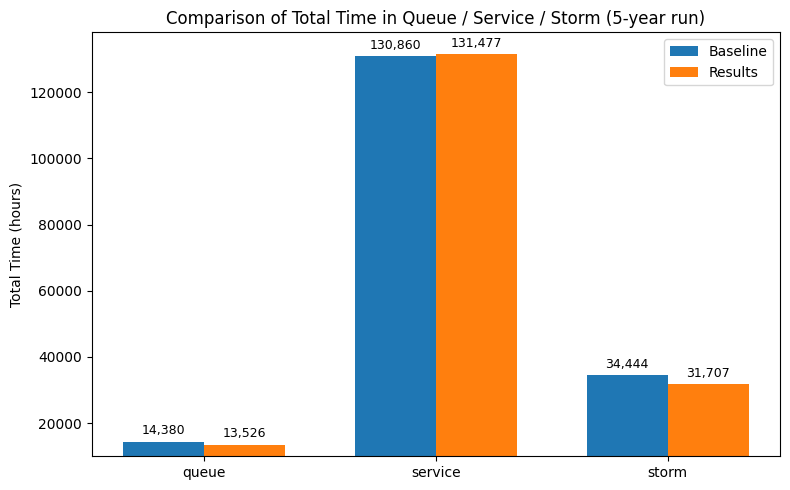

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df_base   = pd.read_csv("results/baseline5.csv")
df_result = pd.read_csv("results/trained5.csv")

# sum each metric
base_queue   = df_base["time_in_queue"].sum()
base_service = df_base["time_in_service"].sum()
base_storm   = df_base["time_in_storm"].sum()

res_queue    = df_result["time_in_queue"].sum()
res_service  = df_result["time_in_service"].sum()
res_storm    = df_result["time_in_storm"].sum()

metrics = ["queue", "service", "storm"]
baseline_vals = [base_queue, base_service, base_storm]
results_vals  = [res_queue,  res_service,  res_storm]

x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
bars_base   = ax.bar([i - width/2 for i in x], baseline_vals, width, label="Baseline")
bars_result = ax.bar([i + width/2 for i in x], results_vals,  width, label="Results")

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel("Total Time (hours)")
ax.set_title("Comparison of Total Time in Queue / Service / Storm (5-year run)")
ax.legend()


ax.set_ylim(10000, max(baseline_vals + results_vals) * 1.05)

def annotate_bars(bars):
    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            h + (max(baseline_vals + results_vals)*0.01),
            f"{h:,.0f}", 
            ha='center', va='bottom', fontsize=9
        )

annotate_bars(bars_base)
annotate_bars(bars_result)

plt.tight_layout()
plt.show()
